In [1]:
#This project can determine whether a movie review is good or bad
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
import os
import csv

#Reference - https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis 
#Dataset - http://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
#Converting the data to CSV file, needs only to be done once.

from __future__ import with_statement
import contextlib

negTrainPath = "C:/Users/segev/Desktop/NLPdataset/train/neg/"
posTrainPath = "C:/Users/segev/Desktop/NLPdataset/train/pos/"

negList = os.listdir(negTrainPath)
posList = os.listdir(posTrainPath)

with open('newInput/Sentiment.csv', 'w', newline='') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(["text", "sentiment"])
    for file in negList:
        file_text = open(negTrainPath + "/" + file)
        current = [file_text.read(), "Negative"]
        writer.writerow(current)
    for file in posList:
        file_text = open(posTrainPath + "/" + file)    
        current = [file_text.read(), "Positive"]
        writer.writerow(current);

In [4]:
data = pd.read_csv('newInput/Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [5]:
print(data)

                                                    text sentiment
0      Story of a man who has unnatural feelings for ...  Negative
1      Airport '77 starts as a brand new luxury 747 p...  Negative
2      This film lacked something I couldn't put my f...  Negative
3      Sorry everyone,,, I know this is supposed to b...  Negative
4      When I was little my parents took me along to ...  Negative
5      "It appears that many critics find the idea of...  Negative
6      The second attempt by a New York intellectual ...  Negative
7      I don't know who to blame, the timid writers o...  Negative
8      This film is mediocre at best. Angie Harmon is...  Negative
9      The film is bad. There is no other way to say ...  Negative
10     This film is one giant pant load. Paul Schrade...  Negative
11     The plot for Descent, if it actually can be ca...  Negative
12     Plot is not worth discussion even if it hints ...  Negative
13     This film is about a male escort getting invol...  Nega

In [6]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


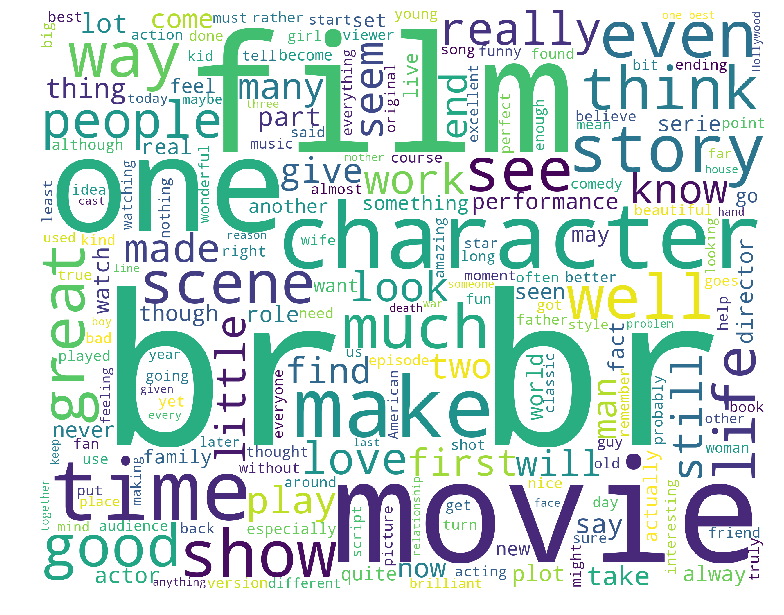

Negative words


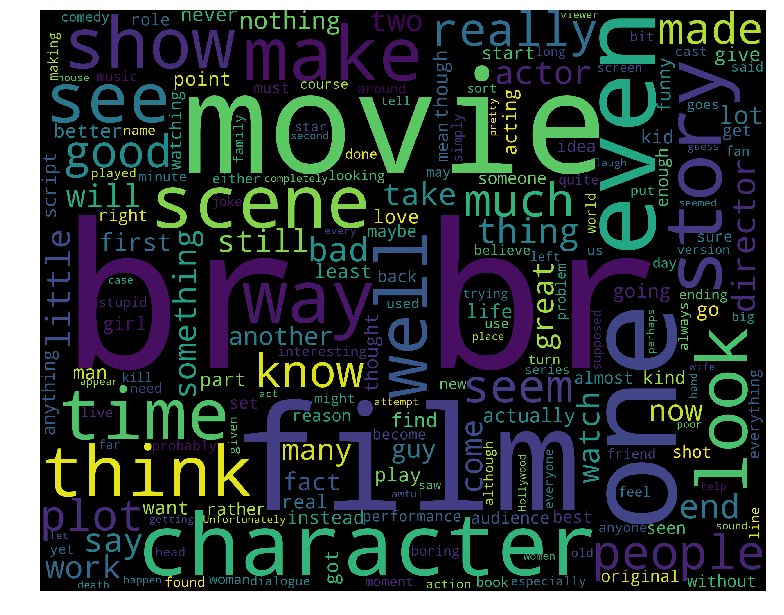

In [7]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [6]:
# nltk.download("stopwords") # needs to be done only once.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\segev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [9]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

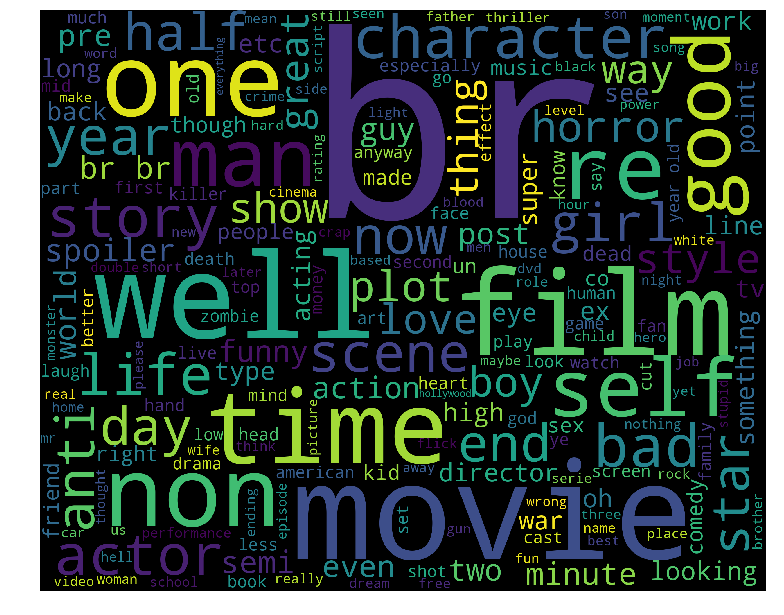

In [10]:
wordcloud_draw(w_features) #  Most frequently distributed words.

In [13]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [14]:
#Showing the NaiveBayes classifier results.

neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 1257/1149 
[Positive]: 1243/970 


In [ ]:
#Training the SVM classifier.

import nltk.classify
from sklearn.svm import LinearSVC

# Training the Naive Bayes classifier
training_set2 = nltk.classify.apply_features(extract_features,tweets)

classifier2 = nltk.classify.SklearnClassifier(LinearSVC())
classifier2.train(training_set2)

In [9]:
#Showing the SVM classifier results.
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier2.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier2.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 855/788 
[Positive]: 206/86 


In [ ]:
#Converting the data to CSV file, needs only to be done once.